In [1]:
import pandas as pd
import numpy as np

In [20]:
hosp = pd.read_csv('../selenium-extraction/resultado.csv', decimal=".")

In [21]:
hosp.columns

Index(['hotel', 'cidade', 'preço', 'checkin', 'checkout', 'dist_centro',
       'dist_praia', 'avaliacao', 'qtnd_avaliacoes', 'data_extracao'],
      dtype='object')

In [4]:
hosp.dtypes

hotel               object
cidade              object
preço                int64
checkin             object
checkout            object
dist_centro        float64
dist_praia         float64
avaliacao          float64
qtnd_avaliacoes    float64
data_extracao       object
dtype: object

## Definindo os tipos das colunas

In [22]:
hosp['checkin'] = hosp["checkin"].astype("category")
hosp['checkout'] = hosp["checkout"].astype("category")
hosp['cidade'] = hosp["cidade"].astype("category")
hosp['hotel'] = hosp["hotel"].astype("category")
hosp['data_extracao'] =hosp["data_extracao"].astype("category")

In [6]:
hosp["cidade"].cat.categories

Index(['Lisboa', 'Paris'], dtype='object')

In [7]:
hosp["hotel"].cat.categories

Index(['#Private room C', '#Tram28_Cosy',
       '* Cozy & Renovated Studio in Paris *',
       '- SweetHome Lisbon sinta-se em casa -',
       '0#Studio 2pers#Champs Elysées#Arc de Triomphe',
       '0.Appart 4pers#Jardin Luxembourg#NECKER',
       '024 A - In the Heart of Lisbon',
       '024 B - Cosy Retreat in Madragoa -Lisbon',
       '024 C - Lisbon Tiles House', '024 D - Cosy Retreat in Lisbon',
       ...
       'xxxx xxxx', '´Sao Vicente III´- Eco-studio french balcony&view',
       'Áurea Museum by Eurostars Hotel Company', 'Échappée sur les toits',
       'Élégance Parisienne au cœur du Marais',
       'Élégant Studio Lumineux Paris',
       'Étage d’un duplex au 17ème arr de Paris  vue sur le Défense à 10min des champs Élysée',
       'ღ Le Jardin Parisien Calme avec Terrasse et Wifi ღ', '休闲民宿', '理想方向'],
      dtype='object', length=6677)

## Removendo Colunas

In [8]:
hosp.shape

(100650, 10)

In [9]:
print(hosp.isnull().sum())

hotel                   0
cidade                  0
preço                   0
checkin                 0
checkout                0
dist_centro             0
dist_praia         100650
avaliacao            3894
qtnd_avaliacoes      3894
data_extracao           0
dtype: int64


Observamos que a coluna "dist_praia" apresenta mais de 100.000 linhas sem valores. Desta forma fica viável a exclusão da coluna, visto que ela apresenta 100% das suas linhas vazias.

In [23]:
hosp.drop(columns=['dist_praia'], inplace=True)

In [11]:
hosp.head(1)

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao
0,TURIM Boulevard Hotel,Lisboa,12144,2024-06-01,2024-06-08,0.9,8.5,5355.0,2024-5-23


## Inserindo Dados Ausentes

Como visto, a tabela possui dois campos que possuem dados ausentes. A ideia aqui é escolher a melhor técnica de imputação de dados para o nosso caso, e assim imputá-los e sumir com os espaços vazios.

In [12]:
print(hosp.isnull().sum())

hotel                 0
cidade                0
preço                 0
checkin               0
checkout              0
dist_centro           0
avaliacao          3894
qtnd_avaliacoes    3894
data_extracao         0
dtype: int64


<Axes: >

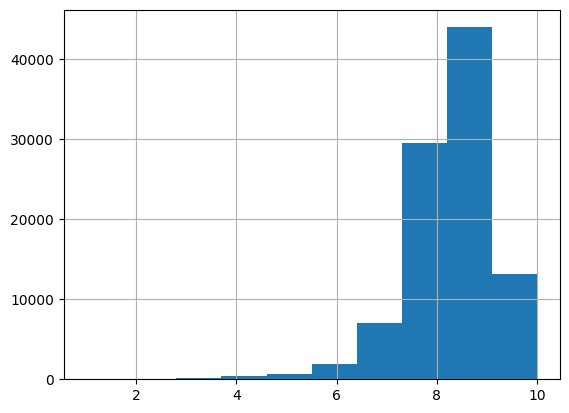

In [13]:
hosp["avaliacao"].hist()

<Axes: >

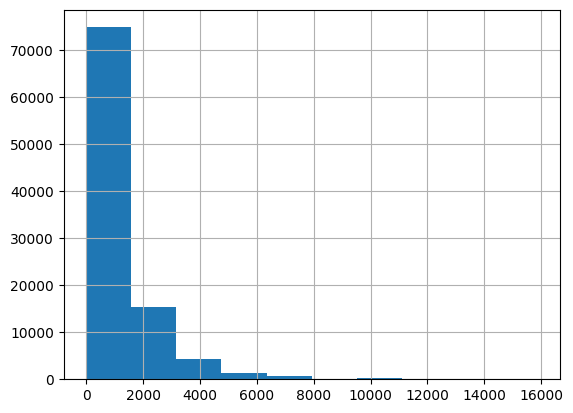

In [14]:
hosp["qtnd_avaliacoes"].hist()

Foi possível perceber a partir dos histogramas que, os dados das colunas avaliação e qtnd_avaliacoes, são assimétricos, então, não é interessante realizar a imputação dos dados a partir da média e mediana dos dados. Uma abordagem interessante para esse cenário seria a utilização do método KNN para imputar os dados a partir da proximidade dos dados.

In [28]:
hosp_input = pd.read_csv('../selenium-extraction/resultado.csv', decimal=".")
hosp_input.drop(columns=['dist_praia'], inplace=True)

In [29]:
hosp_input.dtypes

hotel               object
cidade              object
preço                int64
checkin             object
checkout            object
dist_centro        float64
avaliacao          float64
qtnd_avaliacoes    float64
data_extracao       object
dtype: object

In [30]:
hosp_input['checkin'] = hosp_input['checkin'].astype("category")
hosp_input['checkout'] = hosp_input['checkout'].astype("category")
hosp_input['cidade'] = hosp_input["cidade"].astype("category")
hosp_input['hotel'] = hosp_input["hotel"].astype("category")
hosp_input['data_extracao'] =hosp_input["data_extracao"].astype("category")
hosp_input['avaliacao'] = hosp_input['avaliacao'].replace('None', pd.NA)
hosp_input['avaliacao'] = pd.to_numeric(hosp_input['avaliacao'], errors='coerce')
hosp_input['avaliacao'] =hosp_input["avaliacao"].astype("float")
hosp_input['qtnd_avaliacoes'] = hosp_input['qtnd_avaliacoes'].replace('None', pd.NA)
hosp_input['qtnd_avaliacoes'] = pd.to_numeric(hosp_input['qtnd_avaliacoes'], errors='coerce')
hosp_input['qtnd_avaliacoes'] =hosp_input["qtnd_avaliacoes"].astype("float")

In [31]:
hosp_input['hotel'] = hosp_input['hotel'].cat.codes
hosp_input['checkin'] = hosp_input['checkin'].cat.codes
hosp_input['checkout'] = hosp_input['checkout'].cat.codes
hosp_input['cidade'] = hosp_input['cidade'].cat.codes
hosp_input['data_extracao'] = hosp_input['data_extracao'].cat.codes

In [32]:
hosp_input.head(3)

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao
0,6125,0,12144,0,3,0.9,8.5,5355.0,0
1,4485,0,6478,0,3,3.1,8.3,3469.0,0
2,4246,0,4067,0,3,3.9,8.1,4658.0,0


In [33]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['preço', 'dist_centro', 'avaliacao', 'qtnd_avaliacoes']

scaler = MinMaxScaler()

hosp_input[columns_to_normalize] = scaler.fit_transform(hosp_input[columns_to_normalize])

print(hosp_input)

        hotel  cidade     preço  checkin  checkout  dist_centro  avaliacao  \
0        6125       0  0.027797        0         3     0.016807   0.833333   
1        4485       0  0.014528        0         3     0.063025   0.811111   
2        4246       0  0.008882        0         3     0.079832   0.788889   
3         500       0  0.008620        0         3     0.033613   0.755556   
4        5528       0  0.004393        0         3     0.025210   0.833333   
...       ...     ...       ...      ...       ...          ...        ...   
100645   4367       1  0.026823       49        49     0.012605   0.644444   
100646   5598       1  0.011718       49        49     0.039916        NaN   
100647   1048       1  0.032394       49        49     0.052521   0.888889   
100648   4345       1  0.022275       49        49     0.071429   0.666667   
100649   1949       1  0.013905       49        49     0.096639   0.444444   

        qtnd_avaliacoes  data_extracao  
0              0.33772

In [ ]:
from fancyimpute import KNN
hosp_knn = KNN(k=3).fit_transform(hosp_input)

In [ ]:
hosp2 = pd.DataFrame(data=hosp_knn[0:,0:],columns=['hotel', 'cidade', 'preço', 'checkin', 'checkout', 'dist_centro','avaliacao', 'qtnd_avaliacoes', 'data_extracao'])

In [ ]:
# revertendo a normalização
hosp2[columns_to_normalize] = scaler.inverse_transform(hosp2[columns_to_normalize])

In [ ]:
hosp2.to_csv('dataset_imputado.csv', index=False)

In [40]:
hosp2 = pd.read_csv('./dataset_imputado_azure.csv', decimal=".")

In [27]:
# nova correlação
hosp2.corr(method='spearman')

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao
hotel,1.000000,-0.011205,-0.056653,-0.022800,-0.022748,0.033942,0.055877,0.118322,NaN
cidade,-0.011205,1.000000,0.383131,-0.008059,-0.007619,0.379990,-0.027196,0.115390,NaN
preço,-0.056653,0.383131,1.000000,0.016703,0.017726,-0.084053,0.306950,-0.104463,NaN
checkin,-0.022800,-0.008059,0.016703,1.000000,0.989876,-0.048478,0.058477,-0.197229,NaN
checkout,-0.022748,-0.007619,0.017726,0.989876,1.000000,-0.048001,0.058043,-0.197665,NaN
dist_centro,0.033942,0.379990,-0.084053,-0.048478,-0.048001,1.000000,-0.073571,0.099942,NaN
avaliacao,0.055877,-0.027196,0.306950,0.058477,0.058043,-0.073571,1.000000,0.039476,NaN
qtnd_avaliacoes,0.118322,0.115390,-0.104463,-0.197229,-0.197665,0.099942,0.039476,1.000000,NaN
data_extracao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
hosp_corr = pd.read_csv('../selenium-extraction/resultado.csv', decimal=".")
hosp_corr.drop(columns=['dist_praia'], inplace=True)
# antiga correlação
hosp_corr['checkin'] = hosp_corr['checkin'].astype("category")
hosp_corr['checkout'] = hosp_corr['checkout'].astype("category")
hosp_corr['cidade'] = hosp_corr["cidade"].astype("category")
hosp_corr['hotel'] = hosp_corr["hotel"].astype("category")
hosp_corr['data_extracao'] =hosp_corr["data_extracao"].astype("category")
hosp_corr['hotel'] = hosp_corr['hotel'].cat.codes
hosp_corr['checkin'] = hosp_corr['checkin'].cat.codes
hosp_corr['checkout'] = hosp_corr['checkout'].cat.codes
hosp_corr['cidade'] = hosp_corr['cidade'].cat.codes
hosp_corr['data_extracao'] = hosp_corr['data_extracao'].cat.codes
hosp_corr.corr(method="spearman")

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao
hotel,1.000000,-0.011205,-0.056653,-0.022800,-0.022748,0.033942,0.056593,0.120421,NaN
cidade,-0.011205,1.000000,0.383131,-0.008059,-0.007619,0.379990,-0.031233,0.128419,NaN
preço,-0.056653,0.383131,1.000000,0.016703,0.017726,-0.084053,0.313687,-0.122718,NaN
checkin,-0.022800,-0.008059,0.016703,1.000000,0.989876,-0.048478,0.062800,-0.186332,NaN
checkout,-0.022748,-0.007619,0.017726,0.989876,1.000000,-0.048001,0.062405,-0.186712,NaN
dist_centro,0.033942,0.379990,-0.084053,-0.048478,-0.048001,1.000000,-0.078769,0.110822,NaN
avaliacao,0.056593,-0.031233,0.313687,0.062800,0.062405,-0.078769,1.000000,0.031440,NaN
qtnd_avaliacoes,0.120421,0.128419,-0.122718,-0.186332,-0.186712,0.110822,0.031440,1.000000,NaN
data_extracao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(hosp2.isnull().sum())

hotel              0
cidade             0
preço              0
checkin            0
checkout           0
dist_centro        0
avaliacao          0
qtnd_avaliacoes    0
data_extracao      0
dtype: int64


In [41]:
# nova média
hosp2.mean()

hotel               3427.228097
cidade                 0.500089
preço              11377.355022
checkin               25.055579
checkout              25.051366
dist_centro            2.184525
avaliacao              8.208949
qtnd_avaliacoes      958.859257
data_extracao          0.000000
dtype: float64

In [43]:
# média antiga
hosp_corr.mean()

hotel               3427.228097
cidade                 0.500089
preço              11377.355022
checkin               25.055579
checkout              25.051366
dist_centro            2.184525
avaliacao              8.217686
qtnd_avaliacoes      977.851296
data_extracao          0.000000
dtype: float64

In [44]:
# mediana nova
hosp2.median()

hotel              3444.0
cidade                1.0
preço              7741.0
checkin              25.0
checkout             25.0
dist_centro           1.7
avaliacao             8.3
qtnd_avaliacoes     361.0
data_extracao         0.0
dtype: float64

In [45]:
# mediana antiga
hosp_corr.median()

hotel              3444.0
cidade                1.0
preço              7741.0
checkin              25.0
checkout             25.0
dist_centro           1.7
avaliacao             8.3
qtnd_avaliacoes     389.0
data_extracao         0.0
dtype: float64

In [46]:
hosp2['hotel'] = hosp['hotel']
hosp2['cidade'] = hosp['cidade']
hosp2['checkin'] = hosp['checkin']
hosp2['checkout'] = hosp['checkout']
hosp2['data_extracao'] = hosp['data_extracao']

## Discretização dos Dados

In [65]:
hosp2['preco_binned'] = pd.qcut(hosp2['preço'], q=4, labels=['Baixo', 'Médio Baixo', 'Médio Alto', 'Alto'])

In [66]:
hosp2.head()

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao,preco_binned
0,TURIM Boulevard Hotel,Lisboa,12144.0,2024-06-1,2024-06-8,0.9,8.5,5355.0,2024-5-23,Médio Alto
1,Luzeiros Suites,Lisboa,6478.0,2024-06-1,2024-06-8,3.1,8.3,3469.0,2024-5-23,Médio Baixo
2,Lisbon Serviced Apartments - Campos,Lisboa,4067.0,2024-06-1,2024-06-8,3.9,8.1,4658.0,2024-5-23,Baixo
3,Amazonia Lisboa Hotel,Lisboa,3955.0,2024-06-1,2024-06-8,1.7,7.8,3126.0,2024-5-23,Baixo
4,Rua Luciano Cordeiro Bhuiyan Family Host,Lisboa,2150.0,2024-06-1,2024-06-8,1.3,8.5,144.0,2024-5-23,Baixo


In [67]:
hosp2['dist_centro_binned'] = pd.cut(hosp2['dist_centro'], bins=3, labels=['Próximo', 'Médio', 'Distante'])

In [68]:
hosp2.head(3)

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao,preco_binned,dist_centro_binned
0,TURIM Boulevard Hotel,Lisboa,12144.0,2024-06-1,2024-06-8,0.9,8.5,5355.0,2024-5-23,Médio Alto,Próximo
1,Luzeiros Suites,Lisboa,6478.0,2024-06-1,2024-06-8,3.1,8.3,3469.0,2024-5-23,Médio Baixo,Próximo
2,Lisbon Serviced Apartments - Campos,Lisboa,4067.0,2024-06-1,2024-06-8,3.9,8.1,4658.0,2024-5-23,Baixo,Próximo


In [69]:
hosp2.to_csv('resultado_pre_processamento.csv', index=False)

In [ ]:
hosp2['checkin'] = hosp2['checkin'].astype("category")
hosp2['checkout'] = hosp2['checkout'].astype("category")
hosp2['cidade'] = hosp2["cidade"].astype("category")
hosp2['hotel'] = hosp2["hotel"].astype("category")
hosp2['data_extracao'] = hosp2["data_extracao"].astype("category")
hosp2['hotel'] = hosp2['hotel'].cat.codes
hosp2['checkin'] = hosp2['checkin'].cat.codes
hosp2['checkout'] = hosp2['checkout'].cat.codes
hosp2['cidade'] = hosp2['cidade'].cat.codes
hosp2['data_extracao'] = hosp2['data_extracao'].cat.codes

In [ ]:
#nova correlação
hosp2.corr(method='spearman')

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao
hotel,1.000000,-0.011205,-0.056653,-0.022800,-0.022748,0.033942,0.055778,0.124004,NaN
cidade,-0.011205,1.000000,0.383131,-0.008059,-0.007619,0.379990,-0.031459,0.118741,NaN
preço,-0.056653,0.383131,1.000000,0.016703,0.017726,-0.084053,0.319655,-0.113606,NaN
checkin,-0.022800,-0.008059,0.016703,1.000000,0.989876,-0.048478,0.056043,-0.183567,NaN
checkout,-0.022748,-0.007619,0.017726,0.989876,1.000000,-0.048001,0.055621,-0.183861,NaN
dist_centro,0.033942,0.379990,-0.084053,-0.048478,-0.048001,1.000000,-0.082974,0.107224,NaN
avaliacao,0.055778,-0.031459,0.319655,0.056043,0.055621,-0.082974,1.000000,0.035063,NaN
qtnd_avaliacoes,0.124004,0.118741,-0.113606,-0.183567,-0.183861,0.107224,0.035063,1.000000,NaN
data_extracao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#antiga correlação
hosp['checkin'] = hosp['checkin'].astype("category")
hosp['checkout'] = hosp['checkout'].astype("category")
hosp['hotel'] = hosp['hotel'].cat.codes
hosp['checkin'] = hosp['checkin'].cat.codes
hosp['checkout'] = hosp['checkout'].cat.codes
hosp['cidade'] = hosp['cidade'].cat.codes
hosp['data_extracao'] = hosp['data_extracao'].cat.codes
hosp.corr(method='spearman')

,hotel,cidade,preço,checkin,checkout,dist_centro,avaliacao,qtnd_avaliacoes,data_extracao
hotel,1.000000,-0.011205,-0.056653,-0.022920,-0.022920,0.033942,0.056593,0.120421,NaN
cidade,-0.011205,1.000000,0.383131,-0.008168,-0.008168,0.379990,-0.031233,0.128419,NaN
preço,-0.056653,0.383131,1.000000,0.016103,0.016103,-0.084053,0.313687,-0.122718,NaN
checkin,-0.022920,-0.008168,0.016103,1.000000,1.000000,-0.048895,0.062952,-0.186814,NaN
checkout,-0.022920,-0.008168,0.016103,1.000000,1.000000,-0.048895,0.062952,-0.186814,NaN
dist_centro,0.033942,0.379990,-0.084053,-0.048895,-0.048895,1.000000,-0.078769,0.110822,NaN
avaliacao,0.056593,-0.031233,0.313687,0.062952,0.062952,-0.078769,1.000000,0.031440,NaN
qtnd_avaliacoes,0.120421,0.128419,-0.122718,-0.186814,-0.186814,0.110822,0.031440,1.000000,NaN
data_extracao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
